# Data Exploration of Premier League Player and Match Stats

This Jupyter Notebook provides an exploration of player statistics from the English Premier League. The data was scraped from the website [fbref.com](https://fbref.com/en/comps/9/Premier-League-Stats) using a custom Python script employing Selenium WebDriver.

**Goals of Exploration:**

- Analyze player performance metrics across different teams and seasons.
- Identify trends in player statistics over time.
- Uncover potential correlations between various statistical categories (e.g., goals scored vs. minutes played).
- Gain insights that might be valuable for player evaluation, team strategy analysis, or fantasy football decisions.

**Data Structure:**

- 1 file for the player stats
- 1 file for the match stats.

## Libraries and Data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from helper import *

### Player Data

In [95]:
df_players = pd.read_csv("../data/Premier_League_Player_Stats_Last_6_Seasons.csv")
df_players.head()

,Season,Team,Player,Nation,Pos,Age,MP,Starts,Min,90s,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,2023-2024,Arsenal,William Saliba,fr FRA,DF,23-045,36.0,36.0,"3,240",36.0,...,0.03,0.08,0.06,0.08,0.04,0.01,0.05,0.04,0.05,Matches
1,2023-2024,Arsenal,Declan Rice,eng ENG,MF,25-115,36.0,35.0,"3,045",33.8,...,0.24,0.44,0.21,0.44,0.09,0.15,0.24,0.09,0.24,Matches
2,2023-2024,Arsenal,Bukayo Saka,eng ENG,FW,22-246,34.0,34.0,"2,838",31.5,...,0.29,0.79,0.32,0.60,0.48,0.32,0.80,0.33,0.65,Matches
3,2023-2024,Arsenal,Martin Ødegaard,no NOR,MF,25-143,33.0,33.0,"2,912",32.4,...,0.25,0.49,0.19,0.43,0.22,0.26,0.48,0.17,0.43,Matches
4,2023-2024,Arsenal,Ben White,eng ENG,DF,26-213,35.0,33.0,"2,830",31.4,...,0.13,0.25,0.13,0.25,0.04,0.11,0.15,0.04,0.15,Matches


### Match Data

In [96]:
df_matches = pd.read_csv("../data/Premier_League_Match_Stats_Last_6_Seasons.csv")
df_matches.head()

,season,date,time,team1,team2,score_team1,score_team2,xg_team1,xg_team2,officials,...,clearances_team1,clearances_team2,offsides_team1,offsides_team2,goal_kicks_team1,goal_kicks_team2,throw_ins_team1,throw_ins_team2,long_balls_team1,long_balls_team2
0,2023-2024,Friday August 11,20:00 (venue time),Burnley,Manchester City,0,3,0.3,1.9,"['Craig Pawson (Referee)', 'Simon Bennett (AR1...",...,16,7,0,1,5,7,15,13,65,77
1,2023-2024,Saturday August 12,12:30 (venue time),Arsenal,Nottingham Forest,2,1,0.8,1.2,"['Michael Oliver (Referee)', 'Stuart Burt (AR1...",...,9,18,2,1,8,5,18,9,38,54
2,2023-2024,Saturday August 12,15:00 (venue time),Everton,Fulham,0,1,2.7,1.5,"['Stuart Attwell (Referee)', 'Constantine Hatz...",...,16,31,6,3,9,7,27,22,76,53
3,2023-2024,Saturday August 12,15:00 (venue time),Sheffield United,Crystal Palace,0,1,0.5,1.9,"['John Brooks (Referee)', 'Lee Betts (AR1)', '...",...,36,16,2,2,10,6,18,31,81,72
4,2023-2024,Saturday August 12,15:00 (venue time),Brighton & Hove Albion,Luton Town,4,1,4.0,1.5,"['David Coote (Referee)', 'Mark Scholes (AR1)'...",...,14,28,2,3,8,11,16,11,42,73


In [97]:
print(df_players.shape)
print(df_matches.shape)

print("Total amount of data collected (rows & columns):")
print(df_players.shape[0] + df_matches.shape[0], df_players.shape[1] + df_matches.shape[1])

(4204, 36)
(4448, 44)
Total amount of data collected (rows & columns):
8652 80


## Player Stats

### Initial Data Cleaning

In this section we will perform some basic cleaning steps (handling missing values, converting data types, etc.). Let's start by checking the data types of the dataset.

We can see that there are multiple columns with the same name. This is because the data is structured in a hierarchical manner, with multiple levels of columns, for example: Playing Time, Performance, Expected, Progression, Per 90 Minutes. We have to update the column names to reflect this hierarchy.

In [98]:
df_players.rename(columns={'Gls.1': 'Gls/90'}, inplace=True)
df_players.rename(columns={'Ast.1': 'Ast/90'}, inplace=True)
df_players.rename(columns={'G+A.1': 'G+A/90'}, inplace=True)
df_players.rename(columns={'G-PK.1': 'G-PK/90'}, inplace=True)
df_players.rename(columns={'G+A-PK.1': 'G+A-PK/90'}, inplace=True)
df_players.rename(columns={'xG.1': 'xG/90'}, inplace=True)
df_players.rename(columns={'xAG.1': 'xA/90'}, inplace=True)
df_players.rename(columns={'xG+xA.1': 'xG+xA/90'}, inplace=True)
df_players.rename(columns={'npxG.1': 'npxG/90'}, inplace=True)
df_players.rename(columns={'npxG+xAG.1': 'npxG+xA/90'}, inplace=True)

In [99]:
df_players['Min'] = df_players['Min'].apply(clean_minutes)

We can remove the "Matches" column, as it contains the same value for all rows.

In [100]:
df_players = df_players.drop(columns=['Matches'])

While the player data is being scraped, the code seems to gather some unwanted column headers. This occurs when there are players in the squad that have not featured in any game, so their statistics are not available and they are displayed in a separate "sub-table" within the main table. See the example below: https://fbref.com/en/squads/822bd0ba/Liverpool-Stats

To handle this issue, we will just remove any row, that does not have a nationality and a position, as these should be required fields for all players.

In [101]:
df_players = df_players.dropna(subset=['Nation', 'Pos'], how='all')
print(df_players.shape)

(4000, 35)


A total of 204 rows have now been sucessfully removed.

We could also clean up the Nation column as it contains the flag of the country and the name of the country. We can just keep one of these values.

In [102]:
df_players['Nation'] = df_players['Nation'].astype(str)

# Apply the function to the 'Nation' column
df_players['Nation'] = df_players['Nation'].apply(remove_lowercase)
df_players['Nation'].unique()

array(['FRA', 'ENG', 'NOR', 'BRA', 'ESP', 'GER', 'UKR', 'BEL', 'POL',
       'ITA', 'JPN', 'GHA', 'POR', 'NED', 'EGY', 'EST', 'WAL', 'ARG',
       'SUI', 'CRO', 'COL', 'HUN', 'URU', 'SCO', 'IRL', 'NIR', 'CMR',
       'GRE', 'JAM', 'SWE', 'BFA', 'AUS', 'KOR', 'MLI', 'SEN', 'DEN',
       'ROU', 'ISR', 'PAR', 'SVK', 'ECU', 'SRB', 'ALB', 'FIN', 'MAR',
       'TUN', 'CIV', 'TUR', nan, 'CZE', 'MEX', 'ALG', 'USA', 'GAB', 'AUT',
       'IDN', 'NGA', 'CAN', 'NZL', 'GNB', 'COD', 'IRN', 'GRN', 'ISL',
       'CRC', 'ZIM', 'RSA', 'TOG', 'KVX', 'CHI', 'BIH', 'IRQ', 'GUI',
       'ZAM', 'MNE', 'LBR', 'MSR', 'VEN', 'DOM', 'ANG', 'SLE', 'THA',
       'MKD', 'MTN', 'BUL', 'SKN', 'KEN', 'ARM', 'CUW', 'TAN', 'CUB',
       'CHN', 'EQG', 'PHI', 'GUA', 'BEN', 'SVN'], dtype=object)

The 'Age' column contains the age of the player in years and days. To simplify the analysis, we can convert this to just the age in years.

In [103]:
df_players['Age'] = df_players['Age'].apply(extract_year)

### Exploratory Analysis

- Analyze player performance by team/position (e.g., average goals scored by forwards for each team).
- Visualize trends over time (if data spans multiple seasons).
- Investigate correlations between statistics (e.g., using scatter plots).

In [104]:
season_sum_xg = df_players.groupby('Season')['xG'].sum()
season_sum_xg = season_sum_xg.reset_index(name='Total_xGoals')

season_sum_goals = df_players.groupby('Season')['Gls'].sum()
season_sum_goals = season_sum_goals.reset_index(name='Total_Goals')

season_sum_assists = df_players.groupby('Season')['xAG'].sum()
season_sum_assists = season_sum_assists.reset_index(name='Total_xAst')

season_sum_xa = df_players.groupby('Season')['Ast'].sum()
season_sum_xa = season_sum_xa.reset_index(name='Total_Ast')

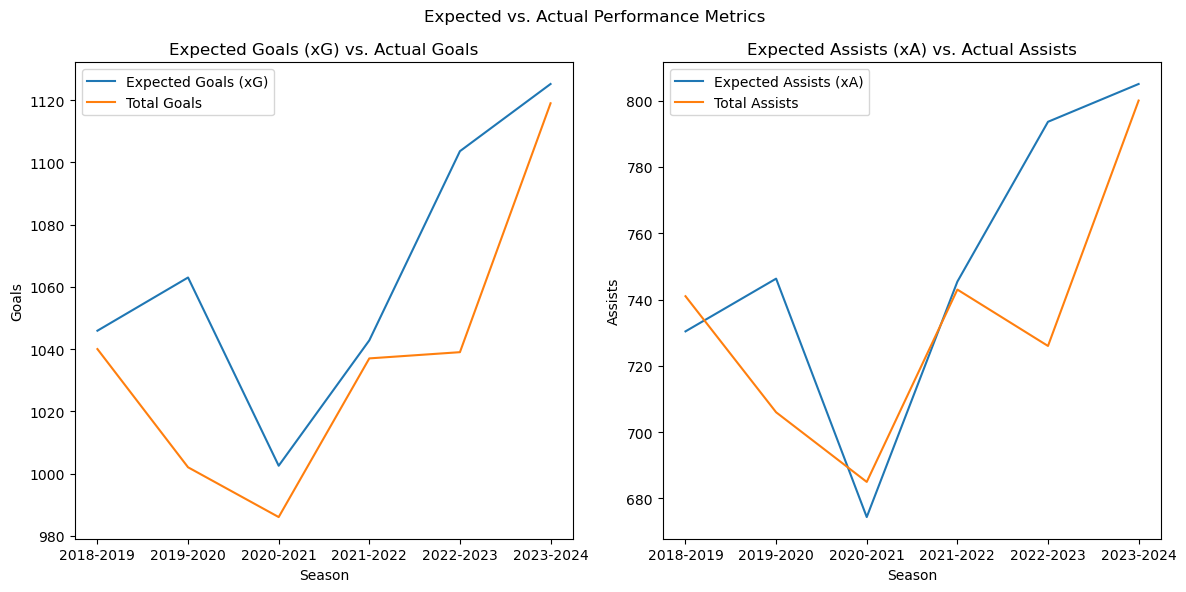

In [105]:
combined_goals = pd.merge(season_sum_xg, season_sum_goals, on='Season') 
combined_ast = pd.merge(season_sum_assists, season_sum_xa, on='Season')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# -------- Plot 1: Goals --------
sns.lineplot(x="Season", y="Total_xGoals", data=combined_goals, label="Expected Goals (xG)", ax=ax1)
sns.lineplot(x="Season", y="Total_Goals", data=combined_goals, label="Total Goals", ax=ax1)
ax1.set_title('Expected Goals (xG) vs. Actual Goals')
ax1.set_xlabel('Season')
ax1.set_ylabel('Goals')

# -------- Plot 2: Assists --------
sns.lineplot(x="Season", y="Total_xAst", data=combined_ast, label="Expected Assists (xA)", ax=ax2)
sns.lineplot(x="Season", y="Total_Ast", data=combined_ast, label="Total Assists", ax=ax2)
ax2.set_title('Expected Assists (xA) vs. Actual Assists')
ax2.set_xlabel('Season')
ax2.set_ylabel('Assists')

fig.suptitle('Expected vs. Actual Performance Metrics')
plt.tight_layout()
plt.show()

We can see a general upward trend of goals scored and assists provided. It's interesting to see that the total amount of goals scored is always lower than the total amount of expected goals.

#### Statistics by Age

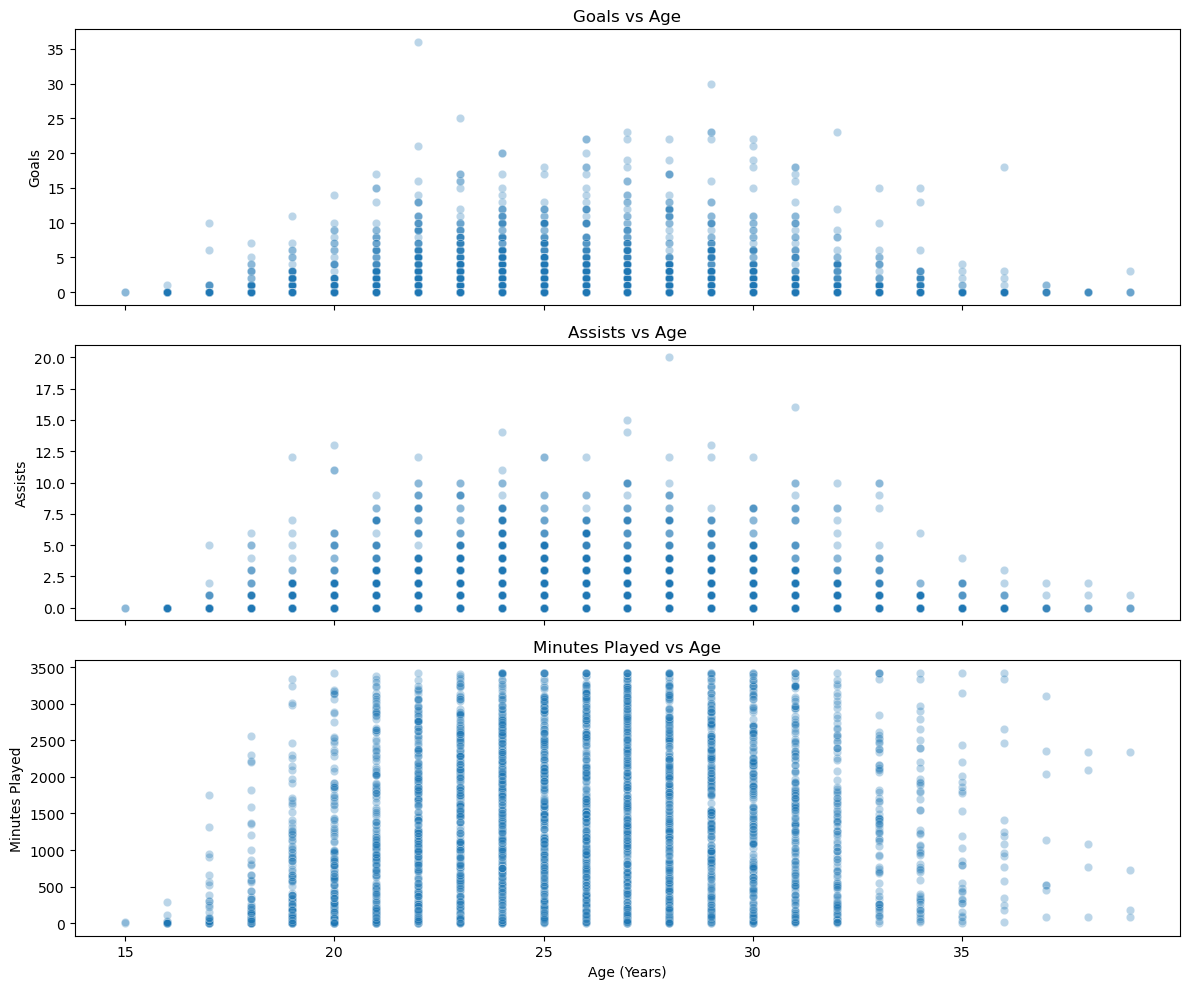

In [106]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Goals vs Age
sns.scatterplot(ax=axes[0], data=df_players, x='Age', y='Gls', alpha=0.3)
axes[0].set_title('Goals vs Age')
axes[0].set_ylabel('Goals')
axes[0].set_xticks(np.arange(15, 40, 5))

# Assists vs Age
sns.scatterplot(ax=axes[1], data=df_players, x='Age', y='Ast', alpha=0.3)
axes[1].set_title('Assists vs Age')
axes[1].set_ylabel('Assists')

# Expected Goals vs Age
sns.scatterplot(ax=axes[2], data=df_players, x='Age', y='Min', alpha=0.3)
axes[2].set_title('Minutes Played vs Age')
axes[2].set_ylabel('Minutes Played')

plt.xlabel('Age (Years)')
plt.tight_layout()
plt.show()

#### Goals & Assists by Position

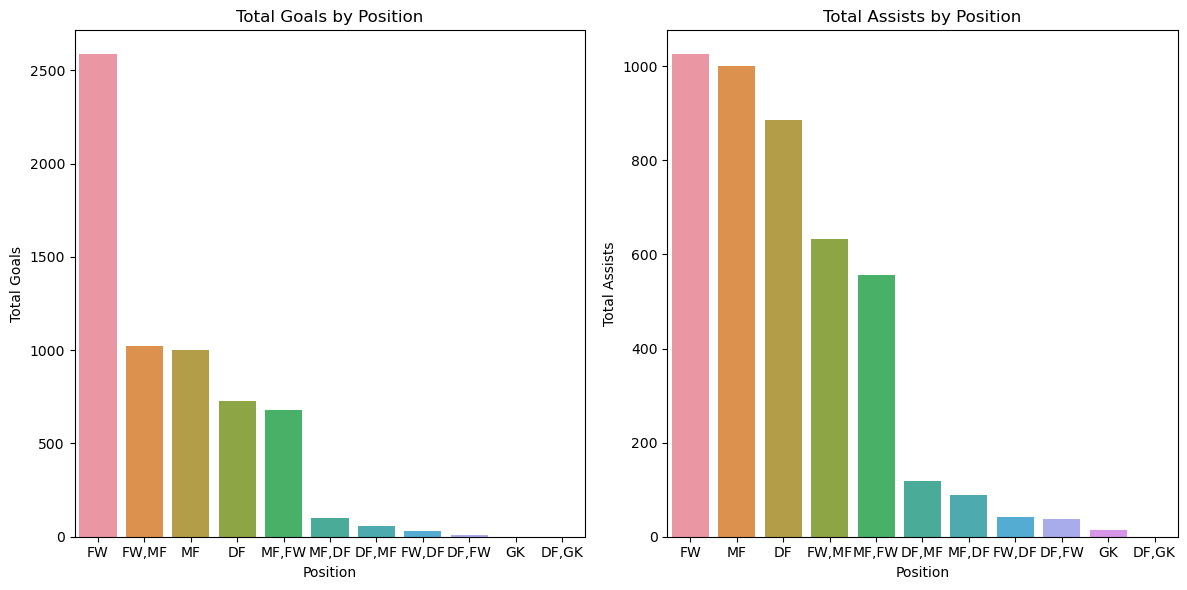

In [107]:
# Group by 'Pos' and calculate the total goals and assists for each position
pos_goals = df_players.groupby('Pos')['Gls'].sum().reset_index()
pos_assists = df_players.groupby('Pos')['Ast'].sum().reset_index()

pos_goals = pos_goals.sort_values(by='Gls', ascending=False)
pos_assists = pos_assists.sort_values(by='Ast', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# -------- Plot 1: Goals by Position --------
sns.barplot(x='Pos', y='Gls', data=pos_goals, ax=ax1)
ax1.set_title('Total Goals by Position')
ax1.set_xlabel('Position')
ax1.set_ylabel('Total Goals')

# -------- Plot 2: Assists by Position --------
sns.barplot(x='Pos', y='Ast', data=pos_assists, ax=ax2)
ax2.set_title('Total Assists by Position')
ax2.set_xlabel('Position')
ax2.set_ylabel('Total Assists')

plt.tight_layout()
plt.show()

Position explanation: 
- FW,MF refers to players primarily playing as forwards and occasionally as midfielders.

As expected, Forwards have by far the highest amount of goals scored, followed by Midfielders. It's interesting to see that other positions provide a significant amount of assists compared to Forwards.

## Match Stats

### Initial Data Cleaning

The first thing we can do delete duplicate columns.

In [108]:
df_matches = df_matches.drop(columns=['__team1', '__team2'])

The next task is to merge date and time to one column and convert it to datetime format. This enables us to make time-based analysis. 

In [109]:
# Apply the function row-wise and create a datetime object
df_matches['year'] = df_matches.apply(determine_year, axis=1)
df_matches['datetime'] = pd.to_datetime(df_matches['date'] + ' ' + df_matches['year'] + ' ' + df_matches['time'].str.extract('(\d+:\d+)')[0], format='%A %B %d %Y %H:%M')

# drop date, time, year columns
df_matches = df_matches.drop(columns=['date', 'time', 'year'])

Now we can also extract the officials and add the type to its own column. 

In [110]:
# Apply the function and directly expand the result into separate columns
df_matches[['Referee', 'AR1', 'AR2', '4th', 'VAR']] = df_matches['officials'].apply(extract_officials)

# drop the original 'officials' column
df_matches = df_matches.drop(columns=['officials'])

# Show a portion of the DataFrame to verify
df_matches[['Referee', 'AR1', 'AR2', '4th', 'VAR']].head()

,Referee,AR1,AR2,4th,VAR
0,Craig Pawson,Simon Bennett,Steve Meredith,Graham Scott,Michael Oliver
1,Michael Oliver,Stuart Burt,Dan Cook,Darren Bond,Jarred Gillett
2,Stuart Attwell,Constantine Hatzidakis,James Mainwaring,Anthony Taylor,Thomas Bramall
3,John Brooks,Lee Betts,Akil Howson,Samuel Allison,Tony Harrington
4,David Coote,Mark Scholes,Tim Wood,John Busby,Robert Jones


In [111]:
columns_to_convert = [
    'possession_team1', 
    'possession_team2', 
    'passing_acc_team1', 
    'passing_acc_team2', 
    'shots_target_team1', 
    'shots_target_team2',
    'saves_team1',
    'saves_team2'
]
convert_percentage_to_float(df_matches, columns_to_convert)

### Exploratory Analysis

In this section we will try to find a couple of the most interesting insights from the match data.

#### Home Advantage Analysis

- Investigate whether playing at home provides a statistical advantage in terms of scoring, possession, or passing accuracy. This could involve comparing the average scores, possession percentages, and passing accuracy for teams when they are listed as team1 (assuming team1 is always the home team) versus when they are team2.
- Furthermore, expanding on this insight, you can analyze whether the home advantage has varied across different seasons or diminished over time, potentially due to changes in game tactics or other external factors like audience restrictions during specific periods (e.g., COVID-19 pandemic).

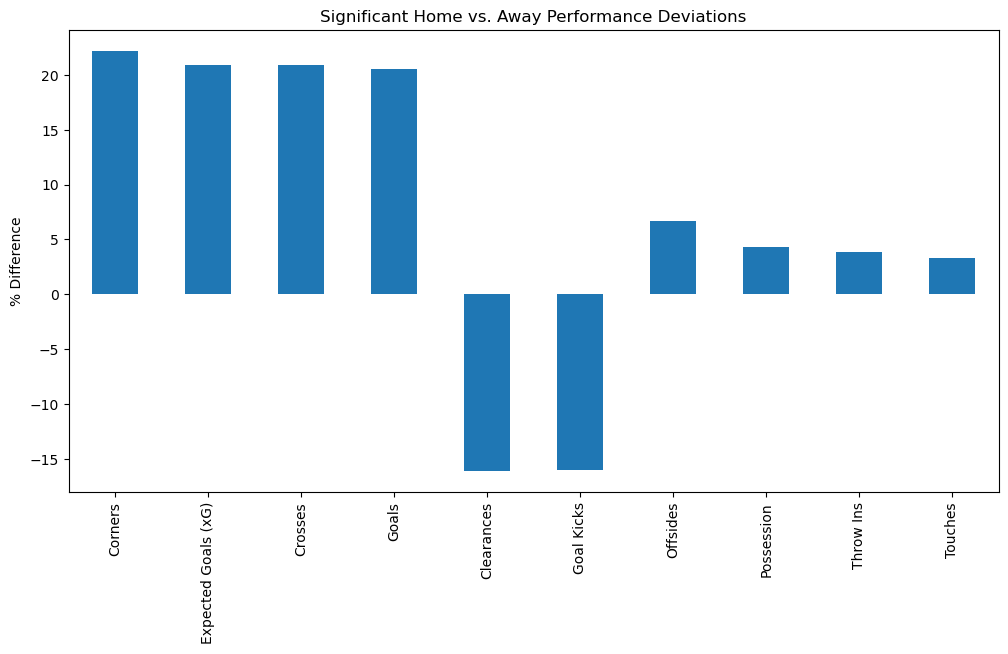

In [112]:
match_columns = ['score_team1', 'score_team2', 'xg_team1',
       'xg_team2', 'possession_team1', 'possession_team2', 'passing_acc_team1',
       'passing_acc_team2', 'shots_target_team1', 'shots_target_team2',
       'saves_team1', 'saves_team2', 'fouls_team1', 'fouls_team2',
       'corners_team1', 'corners_team2', 'crosses_team1', 'crosses_team2',
       'touches_team1', 'touches_team2', 'tackles_team1', 'tackles_team2',
       'interceptions_team1', 'interceptions_team2', 'aerials_won_team1',
       'aerials_won_team2', 'clearances_team1', 'clearances_team2',
       'offsides_team1', 'offsides_team2', 'goal_kicks_team1',
       'goal_kicks_team2', 'throw_ins_team1', 'throw_ins_team2',
       'long_balls_team1', 'long_balls_team2'
]

match_means = df_matches[match_columns].mean()

# Create lists of means for Home and Away based on 'team1' and 'team2' designation
home_means = [match_means[col] for col in match_columns if 'team1' in col]
away_means = [match_means[col] for col in match_columns if 'team2' in col]

mean_values = {'Home': home_means, 'Away': away_means}
metrics = ['Goals', 'Expected Goals (xG)', 'Possession', 'Passing Accuracy', 'Shots on Target', 'Saves', 'Fouls', 'Corners', 
           'Crosses', 'Touches', 'Tackles', 'Interceptions', 'Aerials Won', 'Clearances', 'Offsides', 'Goal Kicks', 
           'Throw Ins', 'Long Balls']

mean_df = pd.DataFrame(mean_values, index=metrics)

# Calculate percentage differences (Home - Away) / Away * 100
mean_df['% Difference'] = ((mean_df['Home'] - mean_df['Away']) / mean_df['Away']) * 100

# Sort by absolute percentage differences to find the most significant deviations
significant_deviations = mean_df['% Difference'].abs().sort_values(ascending=False)
significant_deviations = mean_df.loc[significant_deviations.index]

# plot 6 most significant deviations
fig, ax = plt.subplots(figsize=(12, 6))
significant_deviations['% Difference'].head(10).plot(kind='bar', ax=ax)
ax.set_title('Significant Home vs. Away Performance Deviations')
ax.set_ylabel('% Difference')
plt.show()

Here we can see the most significant differences in the match statistics between the home and away teams. Home teams tend to attack more, as they have around 20% more corners, crosses, expected goals and goals. This directly translates to the away team having more defensive actions, such as clearances and goal kicks. 

What is interesting is that the away team has a higher % of shots on target. Meaning that they are more efficient with their shots.

#### Referee Analysis

In this section we will analyze if referees have a significant impact on the outcome of games from specific teams.

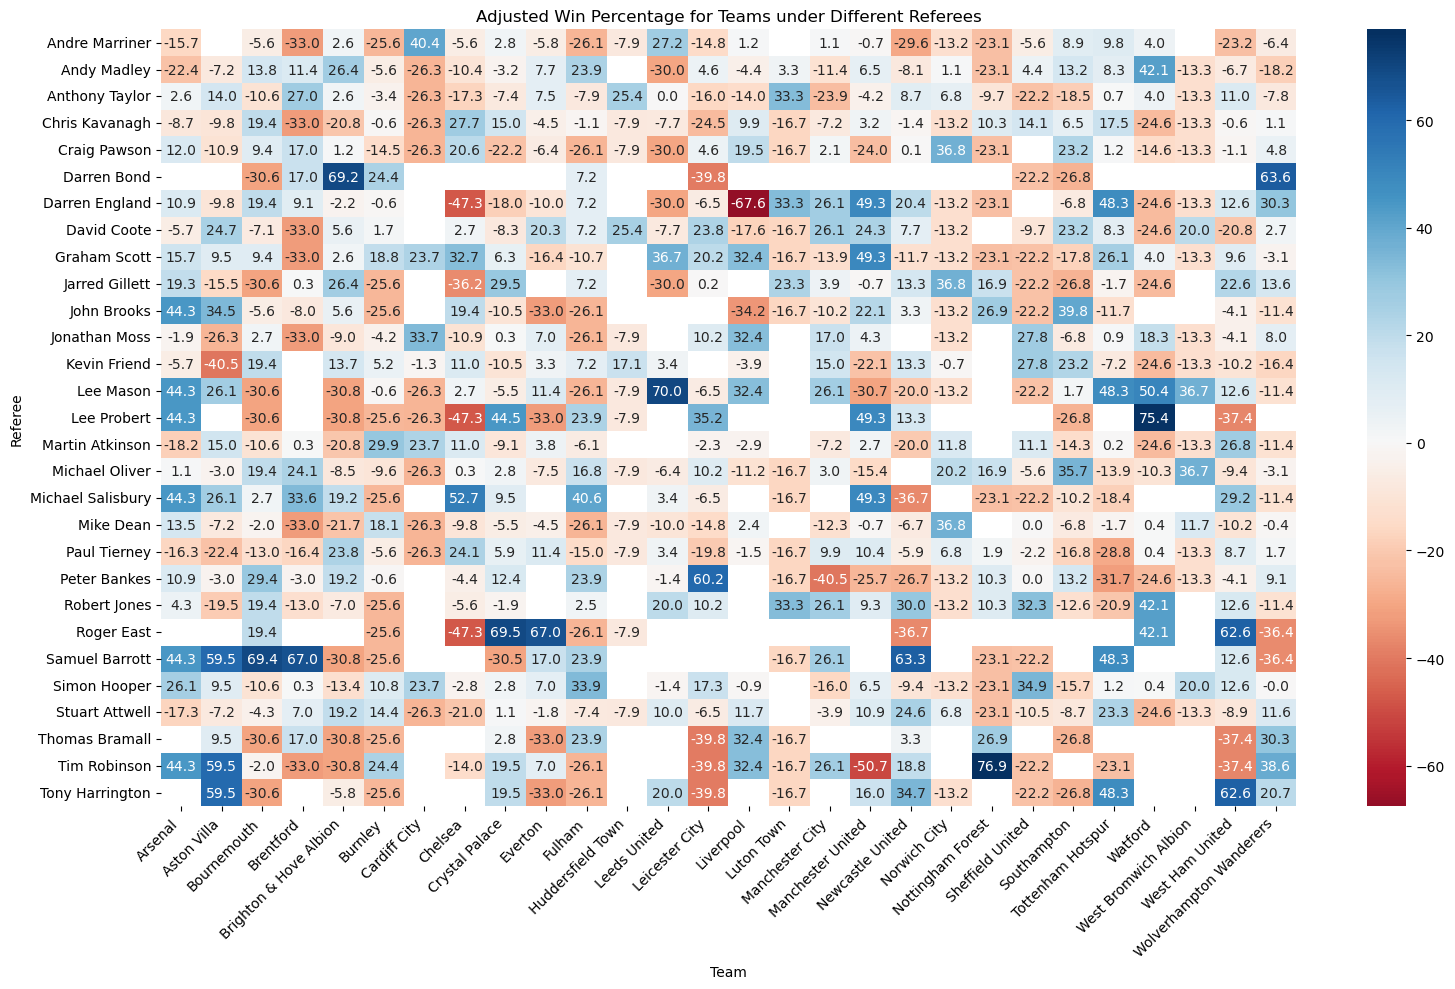

In [113]:
df_matches['outcome_team1'] = 'draw'  # Default to draw
df_matches['outcome_team2'] = 'draw'  # Default to draw

df_matches.loc[df_matches['score_team1'] > df_matches['score_team2'], 'outcome_team1'] = 'win'
df_matches.loc[df_matches['score_team1'] > df_matches['score_team2'], 'outcome_team2'] = 'loss'
df_matches.loc[df_matches['score_team1'] < df_matches['score_team2'], 'outcome_team1'] = 'loss'
df_matches.loc[df_matches['score_team1'] < df_matches['score_team2'], 'outcome_team2'] = 'win'

# Aggregate by referee and team for team1 and team2, then combine both DataFrames
outcomes_team1 = df_matches.groupby(['Referee', 'team1', 'outcome_team1']).size().unstack(fill_value=0).reset_index()
outcomes_team2 = df_matches.groupby(['Referee', 'team2', 'outcome_team2']).size().unstack(fill_value=0).reset_index()

outcomes_team1.columns = ['Referee', 'Team', 'Draws', 'Losses', 'Wins']
outcomes_team2.columns = ['Referee', 'Team', 'Draws', 'Losses', 'Wins']

combined_outcomes = pd.concat([outcomes_team1, outcomes_team2])

# Calculate total matches and win percentage for final aggregated DataFrame
final_outcomes = combined_outcomes.groupby(['Referee', 'Team']).sum().reset_index()
final_outcomes['Total_Matches'] = final_outcomes['Wins'] + final_outcomes['Losses'] + final_outcomes['Draws']
final_outcomes['Win_Percentage'] = (final_outcomes['Wins'] / final_outcomes['Total_Matches']) * 100

# Filter for significant referees and teams
min_matches = 25
referee_counts = final_outcomes.groupby('Referee')['Total_Matches'].sum()
significant_referees = referee_counts[referee_counts >= min_matches].index
team_counts = final_outcomes.groupby('Team')['Total_Matches'].sum()
significant_teams = team_counts[team_counts >= min_matches].index

filtered_outcomes = final_outcomes[(final_outcomes['Referee'].isin(significant_referees)) & (final_outcomes['Team'].isin(significant_teams))]

# Calculate overall win percentage for each team
overall_win_counts = final_outcomes.groupby('Team').sum()[['Wins', 'Total_Matches']]
overall_win_percentage = (overall_win_counts['Wins'] / overall_win_counts['Total_Matches']) * 100

# Adjust win percentage by team's overall performance
filtered_outcomes = filtered_outcomes.copy()  # To avoid SettingWithCopyWarning
filtered_outcomes['Overall_Win_Percentage'] = filtered_outcomes['Team'].apply(lambda x: overall_win_percentage.loc[x])
filtered_outcomes['Adjusted_Win_Percentage'] = filtered_outcomes['Win_Percentage'] - filtered_outcomes['Overall_Win_Percentage']

# Ensure no duplicates that might affect pivoting
filtered_outcomes.drop_duplicates(subset=['Referee', 'Team'], inplace=True)

# Pivot table for visualization, focusing on adjusted win percentage
pivot_adjusted_win_percentage = filtered_outcomes.pivot(index="Referee", columns="Team", values="Adjusted_Win_Percentage")

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_adjusted_win_percentage, annot=True, cmap="RdBu", fmt=".1f", center=0)
plt.title("Adjusted Win Percentage for Teams under Different Referees")
plt.ylabel("Referee")
plt.xlabel("Team")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- A value of 0 would indicate that the team's win rate under that particular referee is exactly what would be expected based on the team's overall win rate. In other words, there is no advantage or disadvantage.

- A positive value suggests that a team has a higher win rate under that referee than their average, indicating a potential advantage. The higher the value, the greater the perceived advantage. For example, if a team has a value of +20 for a specific referee, this means that the team's win percentage in games officiated by that referee is 20 percentage points higher than the team's average win rate.

- Conversely, a negative value suggests that a team has a lower win rate under that referee compared to their average, indicating a potential disadvantage. For instance, a value of -20 would mean the team's win percentage is 20 percentage points lower when that referee is in charge.

We have to keep in mind that some win percentages are based on a very small sample size, so we should not draw any definitive conclusions from this analysis. For example, the most negative win percentage is -67.8% (Darren England refereeing Liverpool games), but this is based on only 3 games.

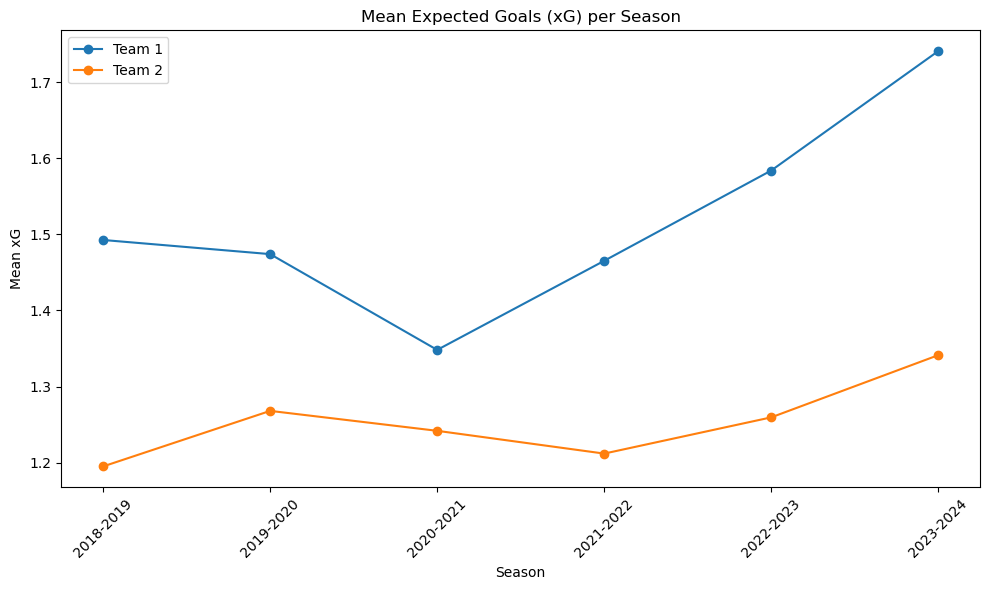

In [114]:
# Extract relevant columns for xG and season
xg_data = df_matches[['season', 'xg_team1', 'xg_team2']]

# Group the data by season and calculate the mean xG for each team
mean_xg_per_season = xg_data.groupby('season').mean().reset_index()

# Plot mean xG for both teams across seasons
plt.figure(figsize=(10, 6))
plt.plot(mean_xg_per_season['season'], mean_xg_per_season['xg_team1'], marker='o', label='Team 1')
plt.plot(mean_xg_per_season['season'], mean_xg_per_season['xg_team2'], marker='o', label='Team 2')
plt.xlabel('Season')
plt.ylabel('Mean xG')
plt.title('Mean Expected Goals (xG) per Season')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

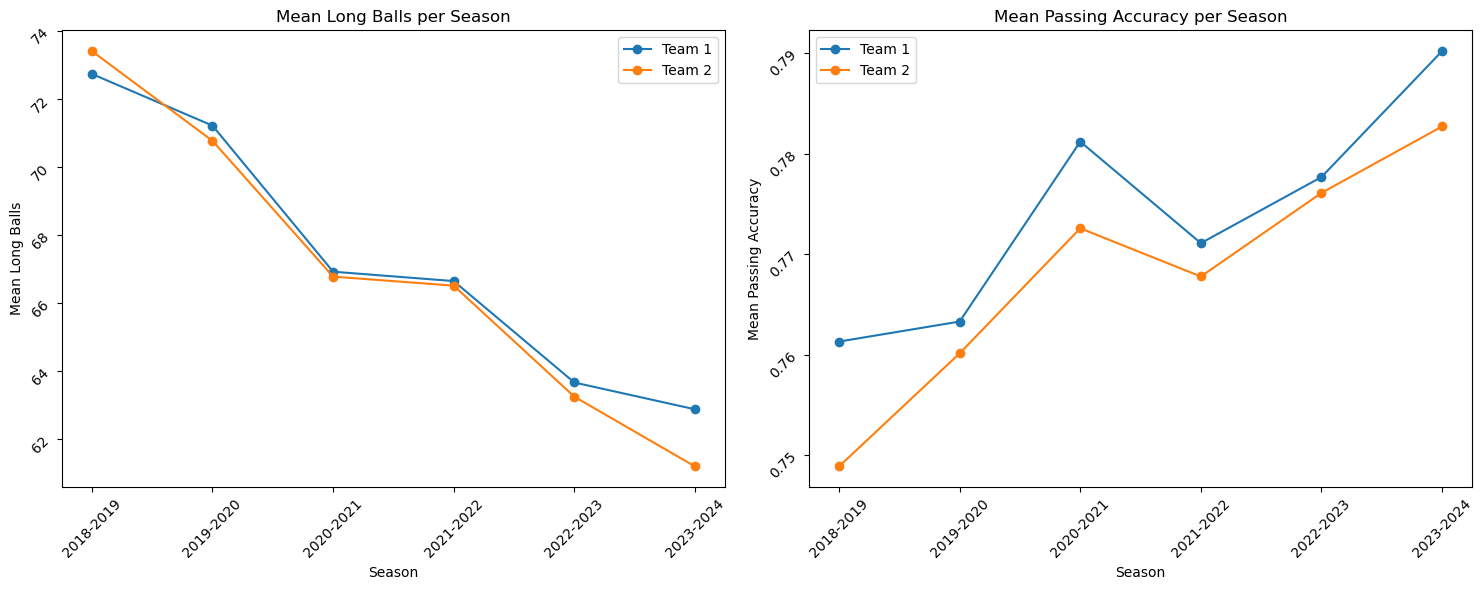

In [115]:
# Extract relevant columns for xG and season
long_balls_data = df_matches[['season', 'long_balls_team1', 'long_balls_team2']]

# Group the data by season and calculate the mean xG for each team
mean_long_balls_per_season = long_balls_data.groupby('season').mean().reset_index()

# Touches per season
passes_data = df_matches[['season', 'passing_acc_team1', 'passing_acc_team2']]
mean_pass_acc_per_season = passes_data.groupby('season').mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot mean long balls for both teams across seasons
axs[0].plot(mean_long_balls_per_season['season'], mean_long_balls_per_season['long_balls_team1'], marker='o', label='Team 1')
axs[0].plot(mean_long_balls_per_season['season'], mean_long_balls_per_season['long_balls_team2'], marker='o', label='Team 2')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Mean Long Balls')
axs[0].set_title('Mean Long Balls per Season')
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot mean touches for both teams across seasons
axs[1].plot(mean_pass_acc_per_season['season'], mean_pass_acc_per_season['passing_acc_team1'], marker='o', label='Team 1')
axs[1].plot(mean_pass_acc_per_season['season'], mean_pass_acc_per_season['passing_acc_team2'], marker='o', label='Team 2')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Mean Passing Accuracy')
axs[1].set_title('Mean Passing Accuracy per Season')
axs[1].tick_params(rotation=45)
axs[1].legend()

plt.tight_layout()
plt.show()

Here we can see a correlation of the average amount of long balls and the passing accuracy per season. It's interesting to see that the passing accuracy has been increasing over the years, while the amount of long balls has been decreasing. This could be due to a change in tactics, for example more teams are playing out from the back. This could also correlate with the increase of goals scored over the years, as seen previously.

### Conclusion

We can see some interesting data, however there is still a lot more to explore, as we have only covered a small portion of the data. We could further investigate the impact of different player statistics on match outcomes, analyze team performance over time, or delve into more advanced statistical modeling techniques to predict future player or team performance.